#                       Employee Performance Rating

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)


1.4.1.post1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls to INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls


In [ ]:
df=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [ ]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [ ]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### We have 1200 Rows and 28 columns in which 19 columns have int datatype and 9 have object datatype and memory usages by this data is 262.6+ KB with no null values present

In [ ]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [ ]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
for i in df:
    print(i)
    print(df[i].unique())

EmpNumber
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFromHome
[10 14  5 16  8  1 24  3 2

# Check the null values present or not

In [ ]:
df.isnull().sum()/len(df)*100

EmpNumber                       0.0
Age                             0.0
Gender                          0.0
EducationBackground             0.0
MaritalStatus                   0.0
EmpDepartment                   0.0
EmpJobRole                      0.0
BusinessTravelFrequency         0.0
DistanceFromHome                0.0
EmpEducationLevel               0.0
EmpEnvironmentSatisfaction      0.0
EmpHourlyRate                   0.0
EmpJobInvolvement               0.0
EmpJobLevel                     0.0
EmpJobSatisfaction              0.0
NumCompaniesWorked              0.0
OverTime                        0.0
EmpLastSalaryHikePercent        0.0
EmpRelationshipSatisfaction     0.0
TotalWorkExperienceInYears      0.0
TrainingTimesLastYear           0.0
EmpWorkLifeBalance              0.0
ExperienceYearsAtThisCompany    0.0
ExperienceYearsInCurrentRole    0.0
YearsSinceLastPromotion         0.0
YearsWithCurrManager            0.0
Attrition                       0.0
PerformanceRating           

In [ ]:
df.drop('EmpNumber',axis=1,inplace=True)

# separating cat and num columns

In [ ]:
cat_col=df.select_dtypes(object)
cat_col

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [ ]:
num_col=df.select_dtypes([int,float])
num_col

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,20,2,6,3,3,6,5,0,4,4
1196,37,10,2,4,80,4,1,4,3,17,1,4,2,3,1,0,0,0,3
1197,50,28,1,4,74,4,1,3,1,11,3,20,3,3,20,8,3,8,3
1198,34,9,3,4,46,2,3,2,1,14,2,9,3,4,8,7,7,7,3


In [ ]:
for i in cat_col:
    print(i)
    print(cat_col[i].unique())

Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime
['No' 'Yes']
Attrition
['No' 'Yes']


In [ ]:
for i in num_col:
    print(i)
    print(num_col[i].unique())

Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
DistanceFromHome
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
EmpEducationLevel
[3 4 2 5 1]
EmpEnvironmentSatisfaction
[4 2 1 3]
EmpHourlyRate
[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobInvolvement
[3 2 1 4]
EmpJobLevel
[2 3 5 1 4]
EmpJobSatisfaction
[4 1 2 3]
NumCompaniesWorked
[1 2 5 3 8 7 9 4 6 0]
EmpLastSalaryHikePercent
[12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
EmpRelationshipSatisfaction
[4 3 2 1]
TotalWorkExperienceInYears
[10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
Train

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in cat_col:
    cat_col[i]=le.fit_transform(cat_col[i])
    print(cat_col[i].unique())
    print(le.classes_)

[1 0]
['Female' 'Male']
[2 1 0 3 4 5]
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
[2 1 0]
['Divorced' 'Married' 'Single']
[5 3 1 0 4 2]
['Data Science' 'Development' 'Finance' 'Human Resources'
 'Research & Development' 'Sales']
[13  8  3 14  6 15  1 16  7 10 12  5 11  9  4 17  0 18  2]
['Business Analyst' 'Data Scientist' 'Delivery Manager' 'Developer'
 'Finance Manager' 'Healthcare Representative' 'Human Resources'
 'Laboratory Technician' 'Manager' 'Manager R&D' 'Manufacturing Director'
 'Research Director' 'Research Scientist' 'Sales Executive'
 'Sales Representative' 'Senior Developer' 'Senior Manager R&D'
 'Technical Architect' 'Technical Lead']
[2 1 0]
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[0 1]
['No' 'Yes']
[0 1]
['No' 'Yes']


In [ ]:
new_df=pd.concat([cat_col,num_col],axis=1)

In [ ]:
new_df

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,Age,DistanceFromHome,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,1,2,2,5,13,2,0,0,32,10,...,12,4,10,2,2,10,7,0,8,3
1,1,2,2,5,13,2,0,0,47,14,...,12,4,20,2,3,7,7,1,7,3
2,1,1,1,5,13,1,1,0,40,5,...,21,3,20,2,3,18,13,1,12,4
3,1,0,0,3,8,2,0,0,41,10,...,15,2,23,2,2,21,6,12,6,3
4,1,2,2,5,13,2,0,0,60,16,...,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,3,0,5,13,1,1,0,27,3,...,20,2,6,3,3,6,5,0,4,4
1196,1,1,2,1,15,2,0,0,37,10,...,17,1,4,2,3,1,0,0,0,3
1197,1,3,1,1,15,2,1,0,50,28,...,11,3,20,3,3,20,8,3,8,3
1198,0,3,2,0,1,2,0,0,34,9,...,14,2,9,3,4,8,7,7,7,3


In [ ]:
new_df.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition', 'Age',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

# EDA

# Numerical columns distribution

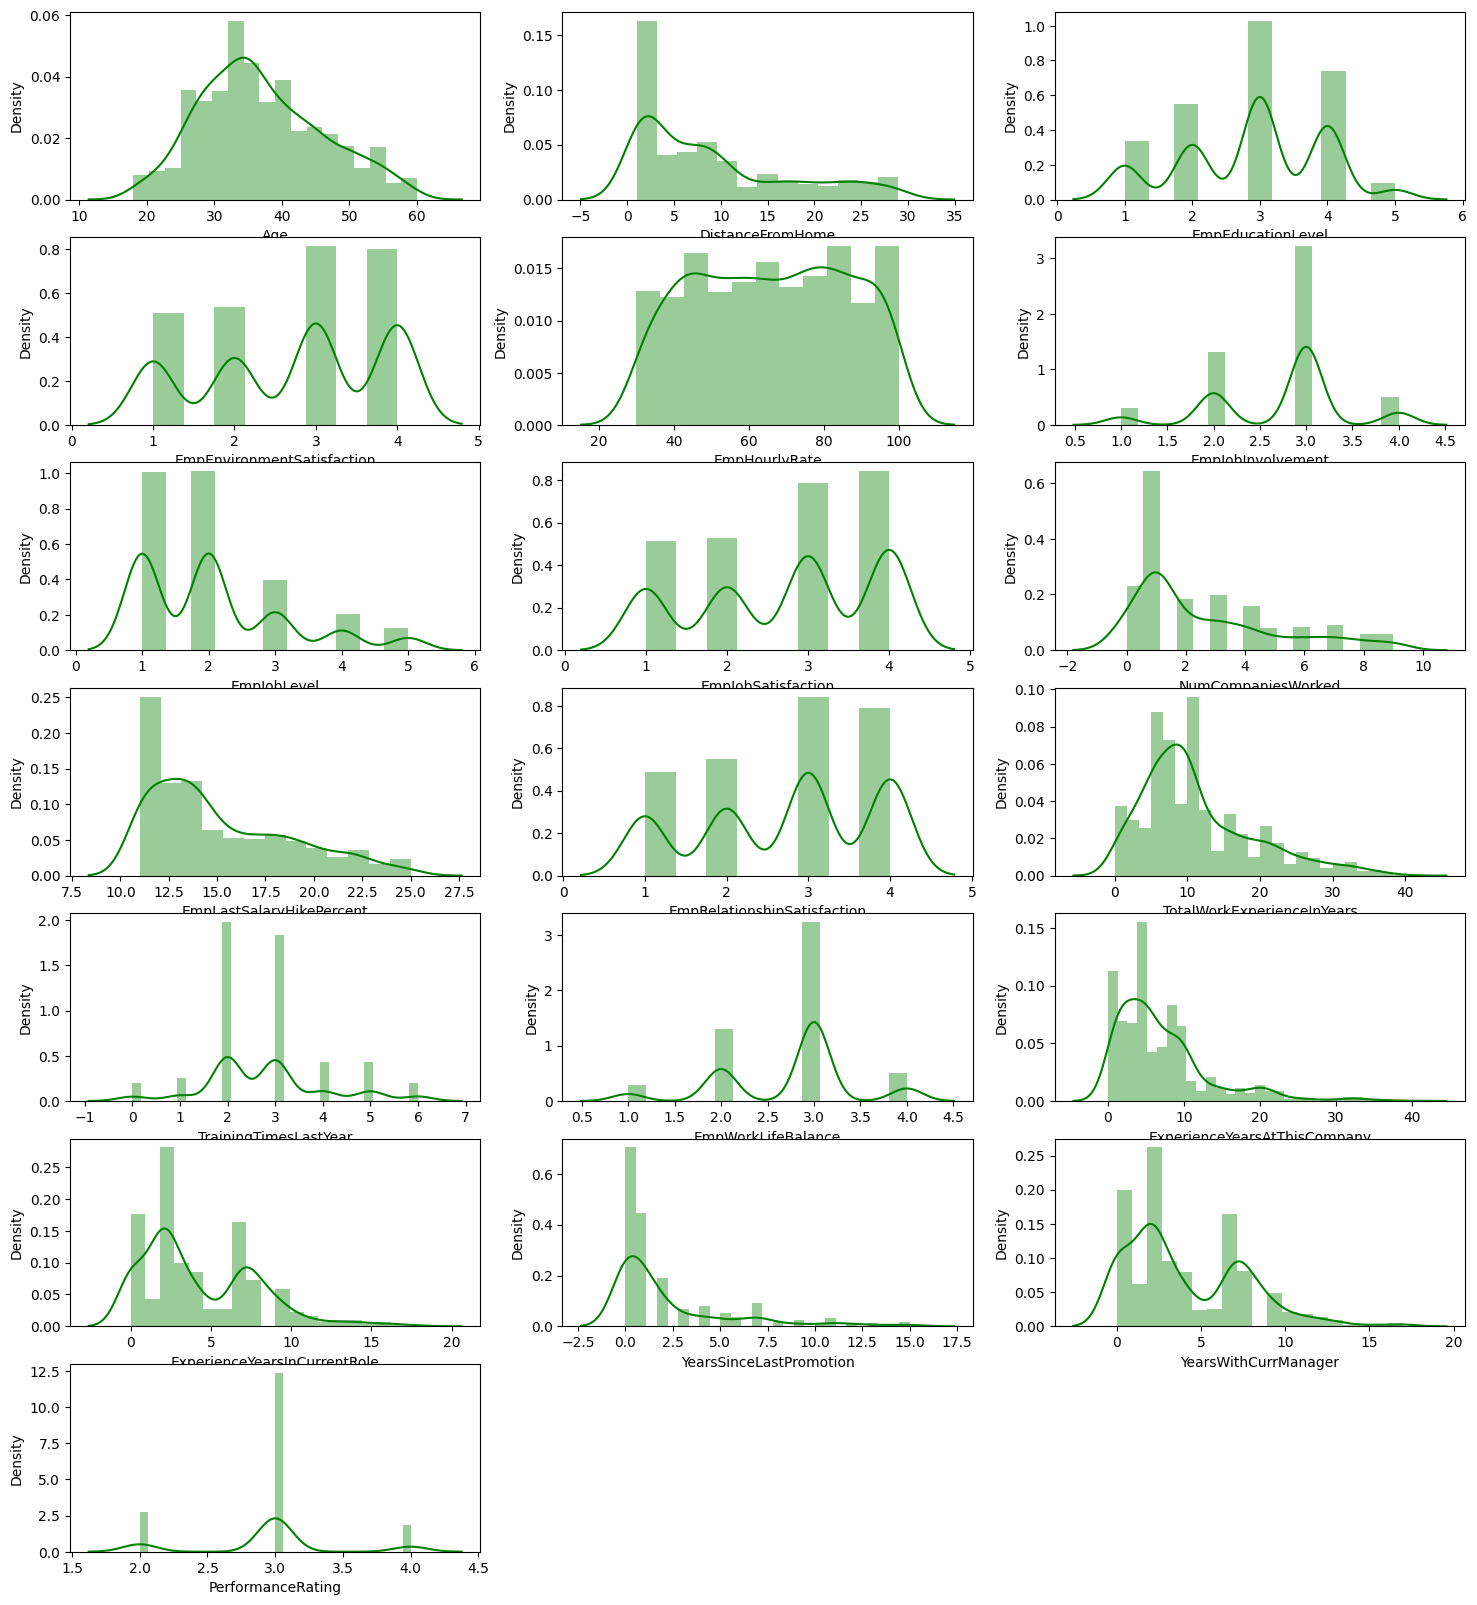

In [ ]:
plt.figure(figsize= (18,20))
count=1
for i in num_col:

    plt.subplot(7,3,count)
    sns.distplot(num_col[i],color='green')
    count+=1
plt.show()

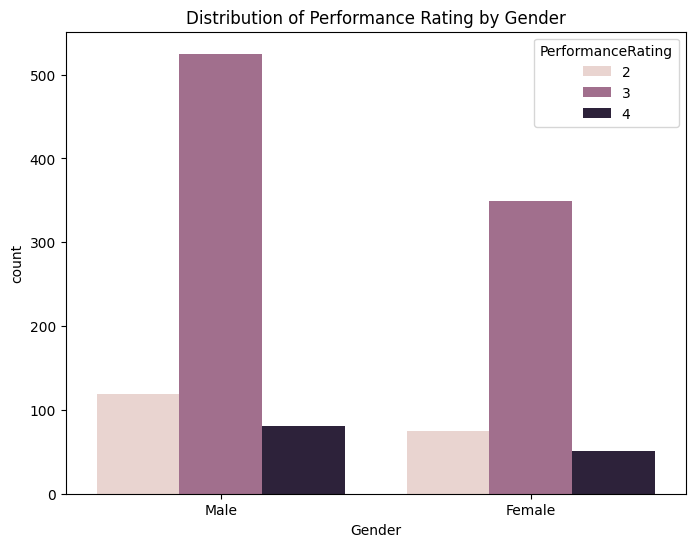

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='PerformanceRating')
plt.title('Distribution of Performance Rating by Gender')
plt.show()


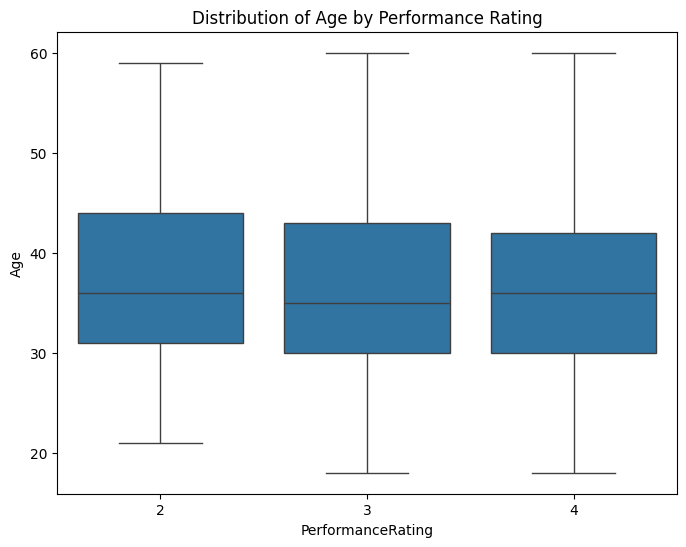

In [ ]:
# Example for 'Age' by Performance Rating
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='PerformanceRating', y='Age')
plt.title('Distribution of Age by Performance Rating')
plt.show()

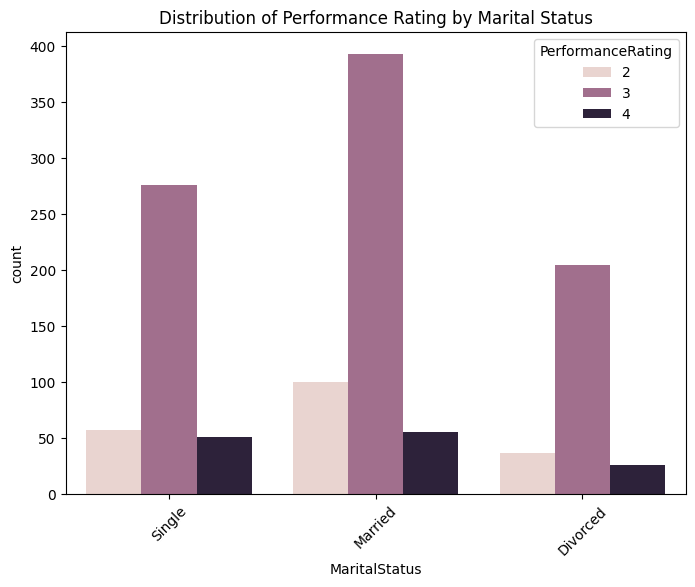

In [ ]:
# Example for 'MaritalStatus' by Performance Rating
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='PerformanceRating')
plt.title('Distribution of Performance Rating by Marital Status')
plt.xticks(rotation=45)
plt.show()


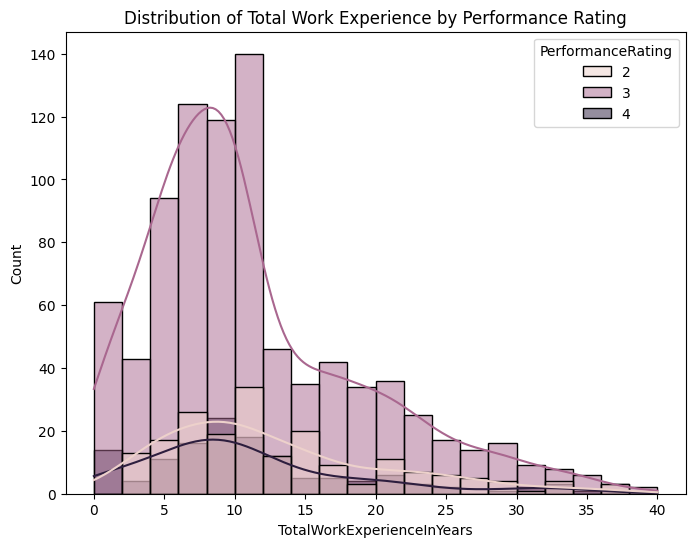

In [ ]:
# Example for 'TotalWorkExperienceInYears'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalWorkExperienceInYears', hue='PerformanceRating', bins=20, kde=True)
plt.title('Distribution of Total Work Experience by Performance Rating')
plt.show()


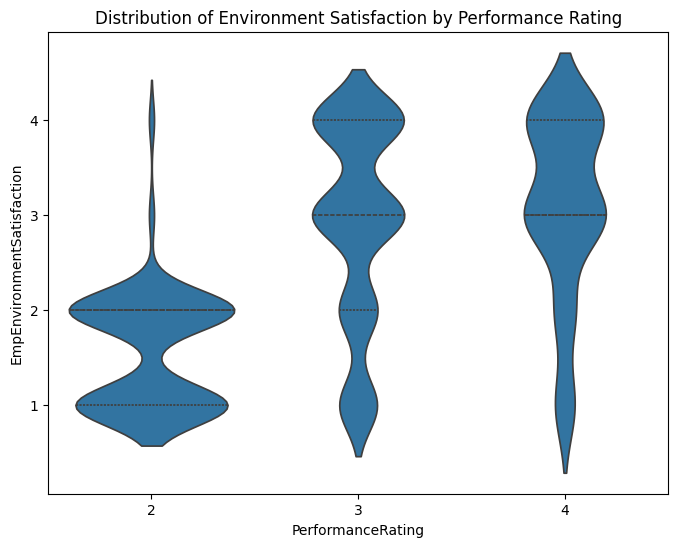

In [ ]:
# Example for 'EmpEnvironmentSatisfaction'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='PerformanceRating', y='EmpEnvironmentSatisfaction', inner='quart')
plt.title('Distribution of Environment Satisfaction by Performance Rating')
plt.show()


<Figure size 1000x600 with 0 Axes>

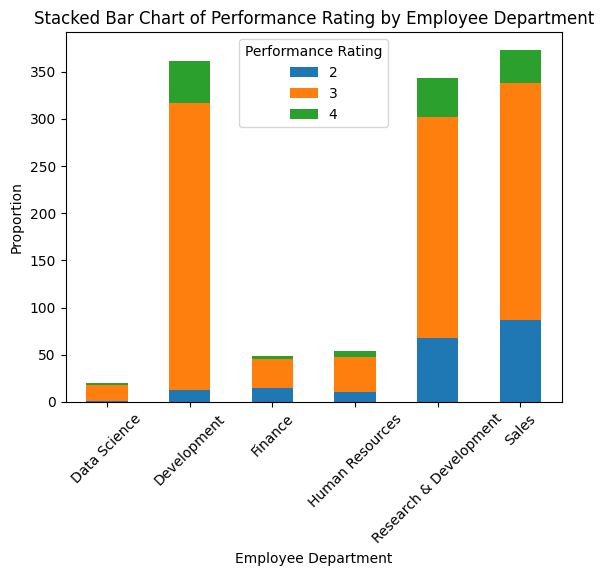

In [ ]:
# Example for 'EmpDepartment' stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['EmpDepartment'], df['PerformanceRating'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Performance Rating by Employee Department')
plt.xlabel('Employee Department')
plt.ylabel('Proportion')
plt.legend(title='Performance Rating')
plt.xticks(rotation=45)
plt.show()


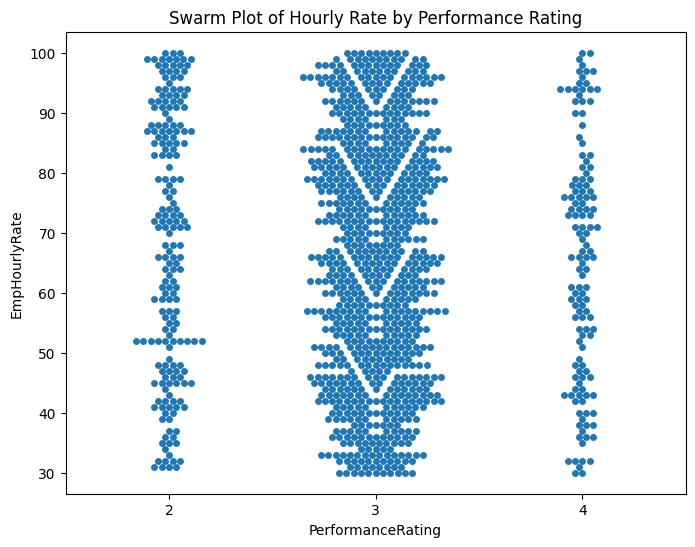

In [ ]:
# Example for 'EmpHourlyRate'
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='PerformanceRating', y='EmpHourlyRate')
plt.title('Swarm Plot of Hourly Rate by Performance Rating')
plt.show()


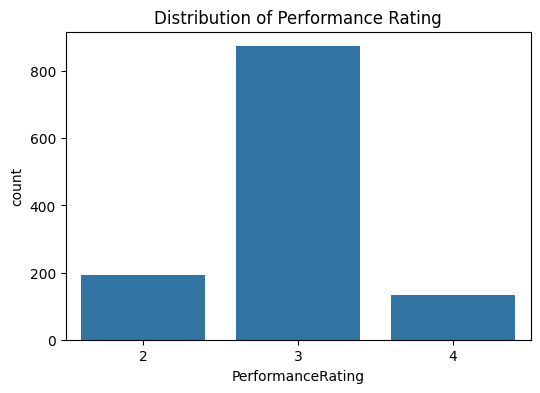

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PerformanceRating')
plt.title('Distribution of Performance Rating')
plt.show()


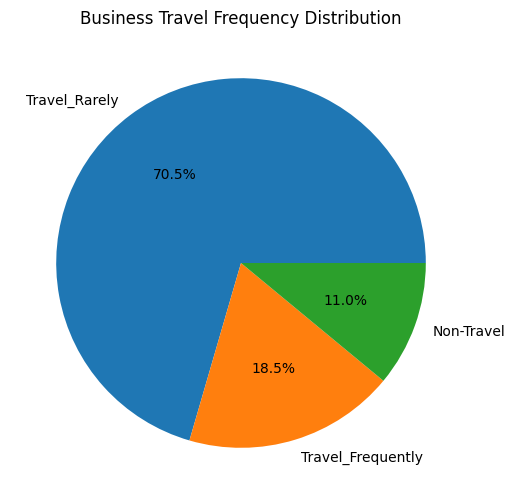

In [ ]:
# Example for 'BusinessTravelFrequency'
plt.figure(figsize=(6, 6))
df['BusinessTravelFrequency'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Business Travel Frequency Distribution')
plt.ylabel('')
plt.show()


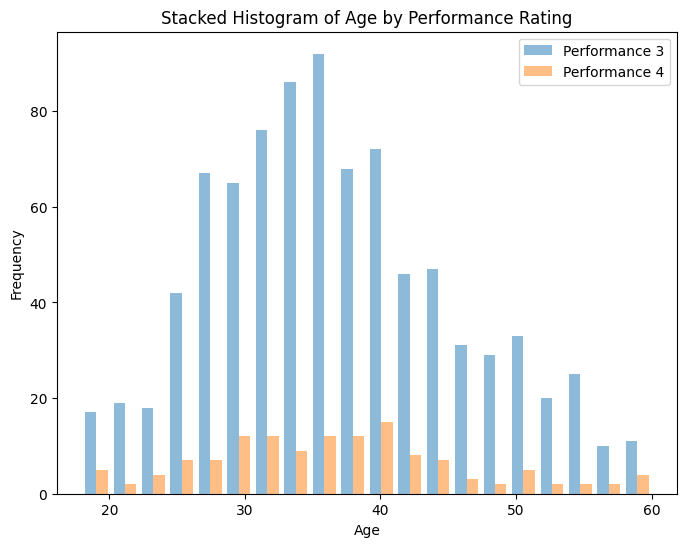

In [ ]:
# Example for 'Age' stacked histogram
plt.figure(figsize=(8, 6))
plt.hist([df[df['PerformanceRating'] == 3]['Age'], df[df['PerformanceRating'] == 4]['Age']],
         bins=20, alpha=0.5, label=['Performance 3', 'Performance 4'])
plt.title('Stacked Histogram of Age by Performance Rating')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


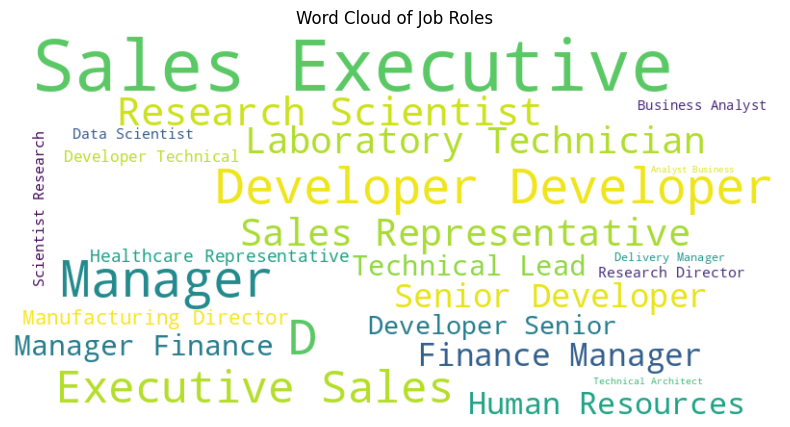

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['EmpJobRole'])
wordcloud = WordCloud(width=800, height=400, background_color='White').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Job Roles')
plt.show()


# Feature Selection

<Axes: >

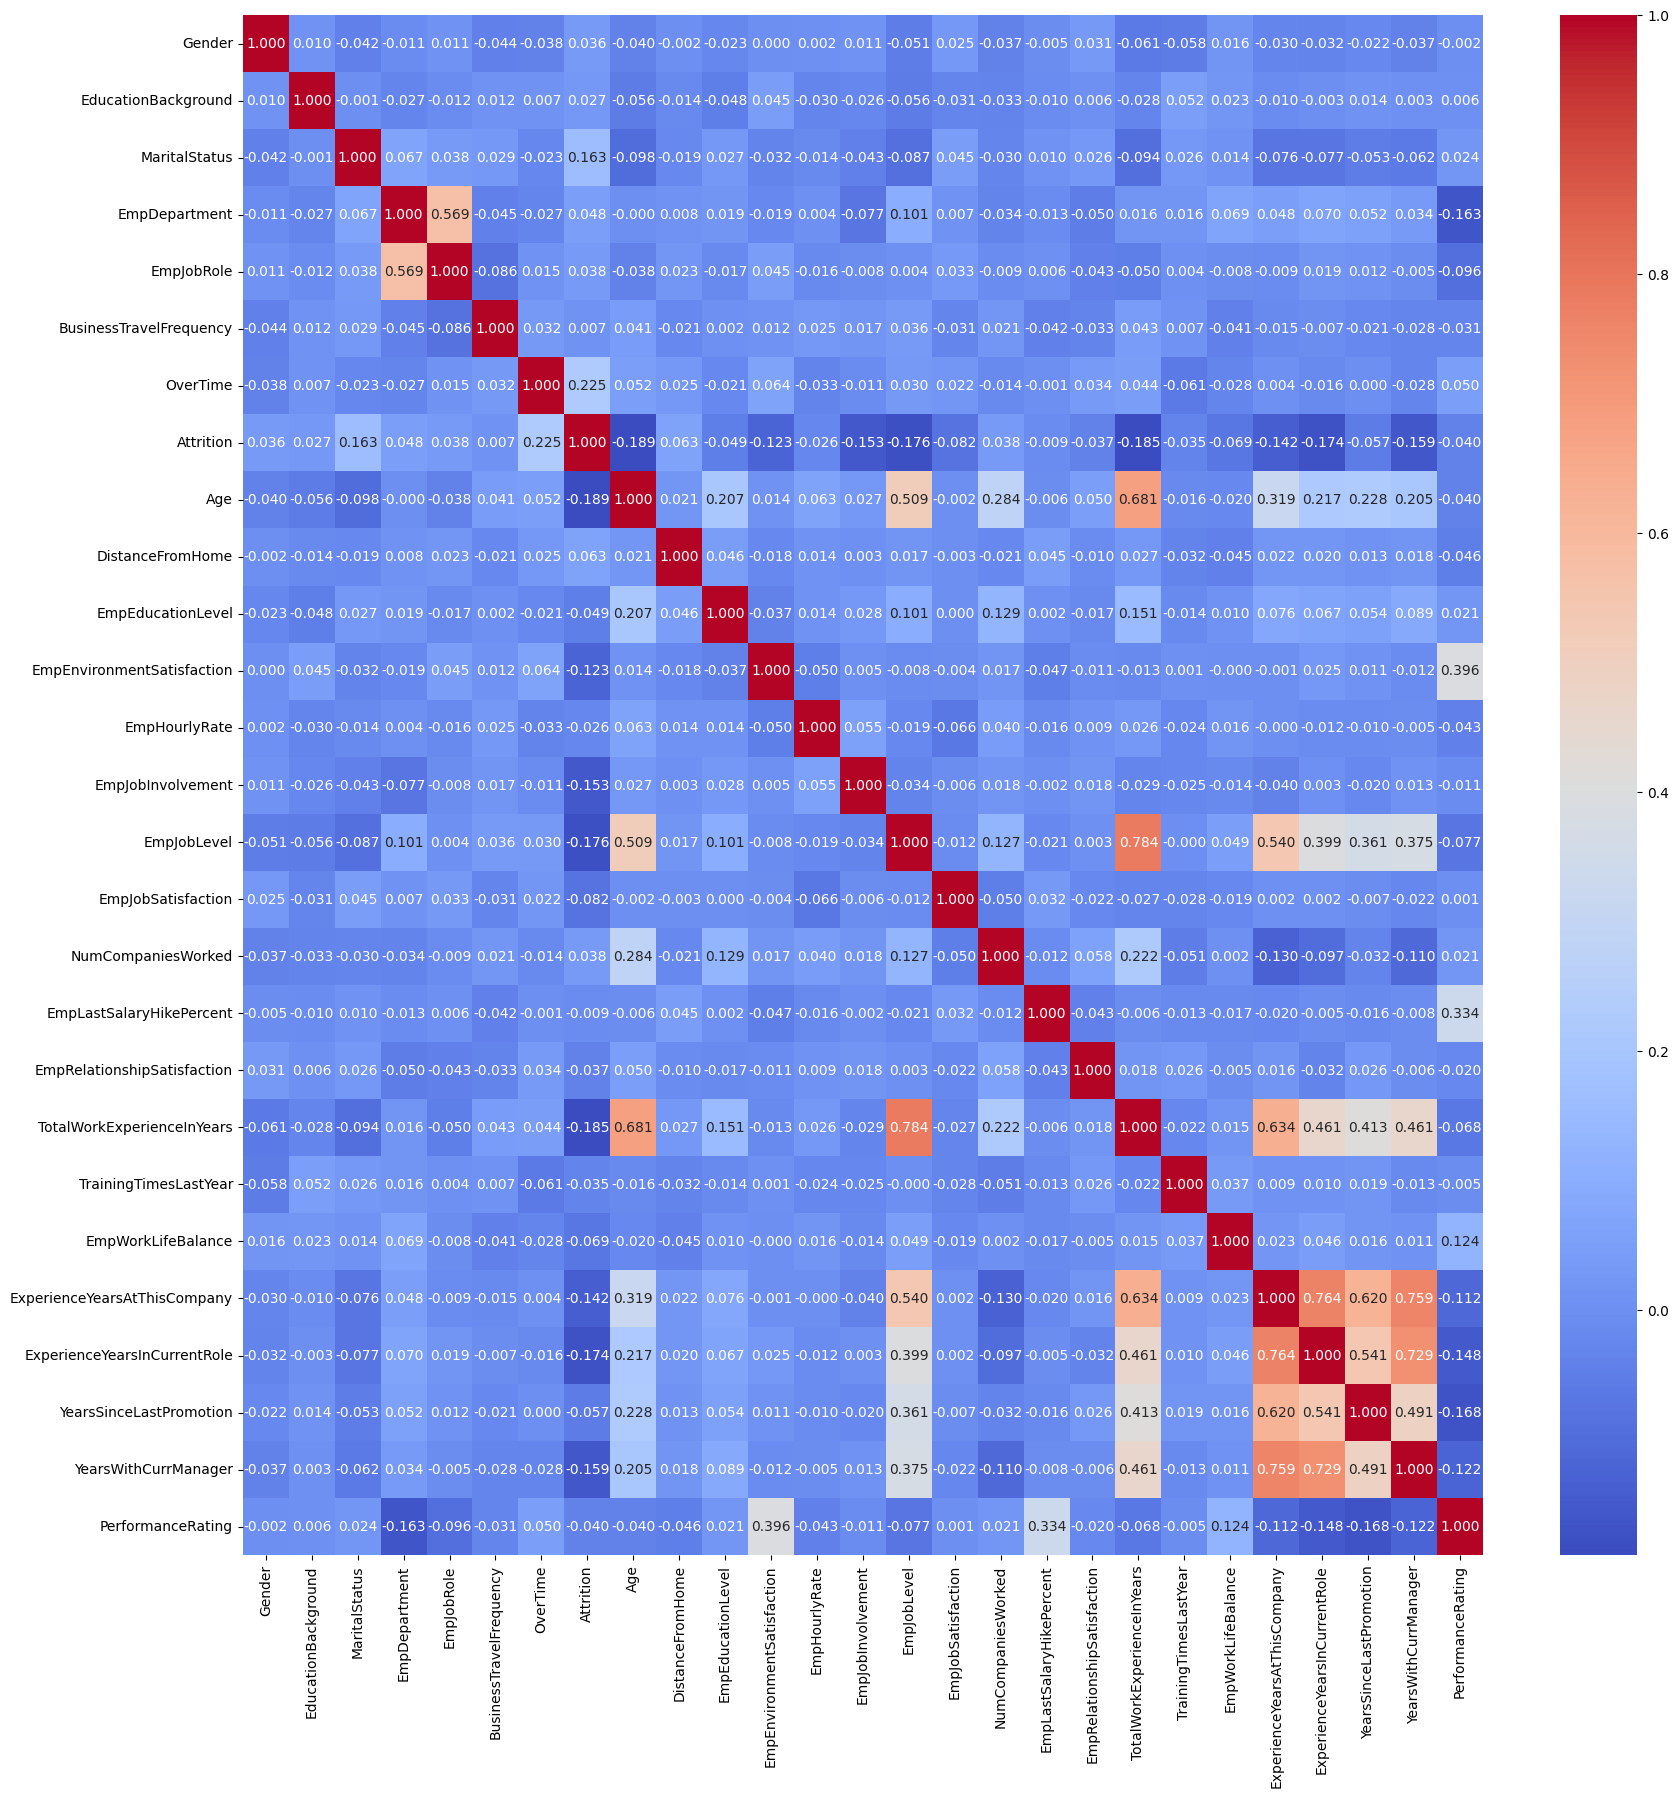

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm',fmt=".3f")

In [ ]:
corr=new_df.corr()['PerformanceRating'].reset_index()
corr.sort_values('PerformanceRating',ascending=False)

,index,PerformanceRating
26,PerformanceRating,1.000000
11,EmpEnvironmentSatisfaction,0.395561
17,EmpLastSalaryHikePercent,0.333722
21,EmpWorkLifeBalance,0.124429
6,OverTime,0.050206
2,MaritalStatus,0.024172
16,NumCompaniesWorked,0.020980
10,EmpEducationLevel,0.020529
1,EducationBackground,0.005607
15,EmpJobSatisfaction,0.000606


<Axes: xlabel='PerformanceRating', ylabel='None'>

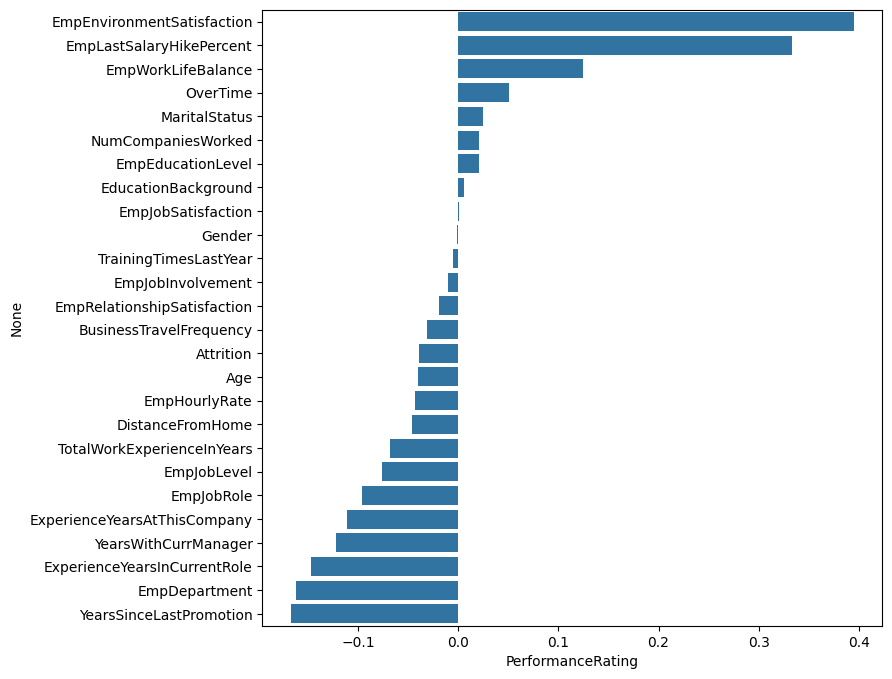

In [ ]:
corelation = pd.DataFrame(new_df.corr())
corelation = pd.DataFrame(corelation['PerformanceRating'])
corelation=corelation.sort_values('PerformanceRating',ascending=False)
indices_to_remove = ['PerformanceRating']
corelation = corelation.drop(indices_to_remove)
plt.figure(figsize=(8,8))
sns.barplot(x=corelation['PerformanceRating'],y=corelation.index)

In [ ]:
new_df.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition', 'Age',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [ ]:
pr=new_df[['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','YearsSinceLastPromotion','EmpDepartment','ExperienceYearsInCurrentRole','EmpHourlyRate','EmpJobRole','TotalWorkExperienceInYears','PerformanceRating']]

In [ ]:
pr

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpDepartment,ExperienceYearsInCurrentRole,EmpHourlyRate,EmpJobRole,TotalWorkExperienceInYears,PerformanceRating
0,4,12,0,5,7,55,13,10,3
1,4,12,1,5,7,42,13,20,3
2,4,21,1,5,13,48,13,20,4
3,2,15,12,3,6,73,8,23,3
4,1,14,2,5,2,84,13,10,3
...,...,...,...,...,...,...,...,...,...
1195,4,20,0,5,5,71,13,6,4
1196,4,17,0,1,0,80,15,4,3
1197,4,11,3,1,8,74,15,20,3
1198,4,14,7,0,7,46,1,9,3


In [ ]:
pr.columns

Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'YearsSinceLastPromotion', 'EmpDepartment',
       'ExperienceYearsInCurrentRole', 'EmpHourlyRate', 'EmpJobRole',
       'TotalWorkExperienceInYears', 'PerformanceRating'],
      dtype='object')


1. **EmpEnvironmentSatisfaction**: This column likely represents the level of employee satisfaction with their work environment. It may contain values indicating how satisfied employees are with factors like office conditions, workspace, or workplace culture.

2. **EmpLastSalaryHikePercent**: This column probably represents the percentage increase in an employee's salary during their most recent salary hike or raise. It measures the extent to which an employee's salary has increased.

3. **YearsSinceLastPromotion**: This column likely indicates the number of years that have passed since an employee's last promotion within the organization. It measures the time interval between promotions.

4. **EmpDepartment**: This column may represent the department or division within the organization where the employee works. It could include values such as "Sales," "Marketing," "Human Resources," etc.

5. **ExperienceYearsInCurrentRole**: This column probably represents the number of years an employee has spent in their current role or position within the company. It measures the duration of time an employee has held their current job title.

6. **EmpHourlyRate**: This column may indicate the hourly wage or pay rate of employees. It represents the amount an employee earns per hour of work.

7. **EmpJobRole**: This column likely represents the job role or title of employees within the organization. It could include values such as "Manager," "Engineer," "Analyst," etc.

8. **TotalWorkExperienceInYears**: This column may represent the total number of years of work experience an employee has, possibly including work experience both within and outside the current organization.

9. **PerformanceRating**: This column is likely the target variable or label for your predictive model. It represents the performance rating assigned to employees. It could be a categorical variable with values such as "2," "3," and "4," indicating different levels of performance.



In [ ]:
for i in pr:
    print(i)
    print(pr[i].unique())

EmpEnvironmentSatisfaction
[4 2 1 3]
EmpLastSalaryHikePercent
[12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
YearsSinceLastPromotion
[ 0  1 12  2  3 11  7  4  5 14  8 15  6 10 13  9]
EmpDepartment
[5 3 1 0 4 2]
ExperienceYearsInCurrentRole
[ 7 13  6  2  0  1  3  8  9  5  4 14 12 10 16 11 15 17 18]
EmpHourlyRate
[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobRole
[13  8  3 14  6 15  1 16  7 10 12  5 11  9  4 17  0 18  2]
TotalWorkExperienceInYears
[10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
PerformanceRating
[3 4 2]


In [ ]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpEnvironmentSatisfaction    1200 non-null   int64
 1   EmpLastSalaryHikePercent      1200 non-null   int64
 2   YearsSinceLastPromotion       1200 non-null   int64
 3   EmpDepartment                 1200 non-null   int64
 4   ExperienceYearsInCurrentRole  1200 non-null   int64
 5   EmpHourlyRate                 1200 non-null   int64
 6   EmpJobRole                    1200 non-null   int64
 7   TotalWorkExperienceInYears    1200 non-null   int64
 8   PerformanceRating             1200 non-null   int64
dtypes: int64(9)
memory usage: 84.5 KB


# split training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=pr.drop(['PerformanceRating'],axis=1)
X

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpDepartment,ExperienceYearsInCurrentRole,EmpHourlyRate,EmpJobRole,TotalWorkExperienceInYears
0,4,12,0,5,7,55,13,10
1,4,12,1,5,7,42,13,20
2,4,21,1,5,13,48,13,20
3,2,15,12,3,6,73,8,23
4,1,14,2,5,2,84,13,10
...,...,...,...,...,...,...,...,...
1195,4,20,0,5,5,71,13,6
1196,4,17,0,1,0,80,15,4
1197,4,11,3,1,8,74,15,20
1198,4,14,7,0,7,46,1,9


In [ ]:
y=pr['PerformanceRating']
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
Xtrain.shape ,Xtest.shape

((960, 8), (240, 8))

In [ ]:
ytrain.shape , ytest.shape

((960,), (240,))

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
Xtrain=se.fit_transform(Xtrain)
Xtest=se.fit_transform(Xtest)

# Training models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
ad=AdaBoostClassifier()
svm=SVC(probability=True)
gau=GaussianNB()
bag=BaggingClassifier()
Gr=GradientBoostingClassifier()


In [ ]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(Xtrain, ytrain)
    ytrain_pred= model.predict(Xtrain)
    ytest_pred= model.predict(Xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", accuracy_score(ytrain,ytrain_pred))
    print("Test Data\n", accuracy_score(ytest,ytest_pred))

In [ ]:
model_building(knn)


KNeighborsClassifier(n_neighbors=3)
Train Data
 0.88125
Test Data
 0.8708333333333333


In [ ]:
model_building(lr)

LogisticRegression()
Train Data
 0.8197916666666667
Test Data
 0.8291666666666667


In [ ]:
model_building(dt)

DecisionTreeClassifier()
Train Data
 1.0
Test Data
 0.8833333333333333


In [ ]:
model_building(ra)

RandomForestClassifier()
Train Data
 1.0
Test Data
 0.9375


In [ ]:
model_building(ad)

AdaBoostClassifier()
Train Data
 0.8864583333333333
Test Data
 0.8833333333333333


In [ ]:
model_building(svm)

SVC(probability=True)
Train Data
 0.896875
Test Data
 0.8791666666666667


In [ ]:
model_building(gau)

GaussianNB()
Train Data
 0.8229166666666666
Test Data
 0.8083333333333333


In [ ]:
model_building(bag)

BaggingClassifier()
Train Data
 0.9885416666666667
Test Data
 0.9166666666666666


In [ ]:
model_building(Gr)

GradientBoostingClassifier()
Train Data
 0.971875
Test Data
 0.9291666666666667


In [ ]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier","svm","GaussianNB","Bagging Classifier", "Gradiant- Bossting Classifier"]

In [ ]:
new_df1 = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,})

In [ ]:
new_df1

,Algorithms,Training Score,Testing Score
0,k-Nearest Neighbors,0.881250,0.870833
1,Logistic Regression,0.819792,0.829167
2,Decision Tree Classifier,1.000000,0.883333
3,Random forest Classifier,1.000000,0.937500
4,Ada-Boosting Classifier,0.886458,0.883333
5,svm,0.896875,0.879167
6,GaussianNB,0.822917,0.808333
7,Bagging Classifier,0.988542,0.916667
8,Gradiant- Bossting Classifier,0.971875,0.929167


# Hypertunning

# Random forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
ra=RandomForestClassifier()

In [ ]:
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight' : ["balanced", "balanced_subsample"]

}


In [ ]:
ra_reg=RandomizedSearchCV(ra,param_distributions=random_forest_params,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
model_building(ra_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
 0.9052083333333333
Test Data
 0.9083333333333333


In [ ]:
ra_reg.best_params_

{'n_estimators': 25,
 'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'bootstrap': False}

# gaussianNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [ ]:
gau=GaussianNB()

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}


In [ ]:
gau_reg=GridSearchCV(gau,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')

In [ ]:
gau_reg.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [ ]:
model_building(gau_reg)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')
Train Data
 0.8229166666666666
Test Data
 0.8083333333333333


# SVM

In [ ]:
svm=SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],
    'class_weight' : ["balanced", "balanced_subsample"]
}

In [ ]:
svm_reg = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=10, cv=5,n_jobs=-1)

In [ ]:
model_building(svm_reg)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})
Train Data
 0.8416666666666667
Test Data
 0.8166666666666667


# Gradient Boosting


In [ ]:
param_grid_classification = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'loss': ['deviance', 'exponential']
}

In [ ]:
gr_reg=RandomizedSearchCV(Gr,param_distributions=param_grid_classification,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
model_building(gr_reg)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'deviance' instead.

--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'deviance' instead.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 673, in fit
    self._loss = self._get_loss(sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 1537, in _get_loss
    raise ValueError(
ValueError: loss='exponential' is only suitable for a binary classification problem, you have n_classes=3. Please use loss='log_loss' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of GradientBoostingClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


# We select random forest as a best algorithm

In [ ]:
pr.head(3)

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpDepartment,ExperienceYearsInCurrentRole,EmpHourlyRate,EmpJobRole,TotalWorkExperienceInYears,PerformanceRating
0,4,12,0,5,7,55,13,10,3
1,4,12,1,5,7,42,13,20,3
2,4,21,1,5,13,48,13,20,4


In [ ]:
for i in pr:
    print(i)
    print(pr[i].unique())

EmpEnvironmentSatisfaction
[4 2 1 3]
EmpLastSalaryHikePercent
[12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
YearsSinceLastPromotion
[ 0  1 12  2  3 11  7  4  5 14  8 15  6 10 13  9]
EmpDepartment
[5 3 1 0 4 2]
ExperienceYearsInCurrentRole
[ 7 13  6  2  0  1  3  8  9  5  4 14 12 10 16 11 15 17 18]
EmpHourlyRate
[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobRole
[13  8  3 14  6 15  1 16  7 10 12  5 11  9  4 17  0 18  2]
TotalWorkExperienceInYears
[10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
PerformanceRating
[3 4 2]


In [ ]:
new_data2=pd.DataFrame({'EmpEnvironmentSatisfaction':[4],'EmpLastSalaryHikePercent':[21],
         'YearsSinceLastPromotion':[1],'EmpDepartment':[5],'ExperienceYearsInCurrentRole':[13],'EmpHourlyRate':[48],'EmpJobRole':[13],'TotalWorkExperienceInYears':[20]
         })

In [ ]:
pred=bag.predict(new_data2)
pred[0]

4

In [ ]:
scaled_new_data = se.transform(new_data2)

In [ ]:
predictions = ra_reg.predict(scaled_new_data)

In [ ]:
predictions[0]

4

In [ ]:
pr.head(1)

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpDepartment,ExperienceYearsInCurrentRole,EmpHourlyRate,EmpJobRole,TotalWorkExperienceInYears,PerformanceRating
0,4,12,0,5,7,55,13,10,3


In [ ]:
new_data2

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpDepartment,ExperienceYearsInCurrentRole,EmpHourlyRate,EmpJobRole,TotalWorkExperienceInYears
0,4,21,1,5,13,48,13,20


In [ ]:
pr.head(3)

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpDepartment,ExperienceYearsInCurrentRole,EmpHourlyRate,EmpJobRole,TotalWorkExperienceInYears,PerformanceRating
0,4,12,0,5,7,55,13,10,3
1,4,12,1,5,7,42,13,20,3
2,4,21,1,5,13,48,13,20,4


In [ ]:
scaled_new_data2 = se.transform(new_data2)

In [ ]:
predictions1 = ra_reg.predict(scaled_new_data2)

In [ ]:
predictions1[0]

4

In [ ]:
import pickle

In [ ]:
pickle.dump(ra_reg,open('performancemodel.pkl','wb'))
pickle.dump(se,open('performancescaling.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)


1.4.1.post1


In [ ]:
pr.columns

Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'YearsSinceLastPromotion', 'EmpDepartment',
       'ExperienceYearsInCurrentRole', 'EmpHourlyRate', 'EmpJobRole',
       'TotalWorkExperienceInYears', 'PerformanceRating'],
      dtype='object')